# A1 CAR PRICE PREDICTION

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

## 1. Loaing the data


In [49]:
# we have saved the data in the data folder with the name cars
#we will us the pandas read_csv to rad the dat since the data is in the format of CSV file

df=pd.read_csv('data/Cars.csv')

In [50]:
#now lets check if the data is loaded in the df dataframe named df

df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [51]:
#lets look at the first 5 rows using the head()

df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [52]:
#the shaope of the datframe tells us some of the vital things such as the number if features and number of samples
#to see the shape of the dataframe lets look at the number of features and sample of out dataframe

df.shape

(8128, 13)

#### *Our dataframe has:-*

 *8128 samples*
 
 *13 features*

In [53]:
#lets look at the dtype of each of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB



#### *The column milage, engine, max_power, torque and seats have the missing values*

In [54]:
#the columns of the dataframe are

df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

#### *The dataframe has 13 features* 

*name*, *year*, *selling_price*, *km_driven*, *fuel*, *seller_type* , *transmission*, 'owner*, *mileage*, *engine*, *max_power*, *torque*, *seats*


In [55]:
#lets create a new dataframe just for safty and operate on it
#(we create a new dataframe df1 that is a copy of the df)
df1=df
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


## 2. label encoding

### Task 1:-  For the feature owner, map First owner to 1, ..., Test Drive Car to 5

In [56]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()

df1['encoded_owner']=label.fit_transform(df1['owner'].map({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}))
df1['encoded_owner'] = df1['encoded_owner'].map({0: 1, 1: 2, 2: 3, 3: 4, 4: 5})
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,encoded_owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,3
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,1
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,4
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,1
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,1


we can see that on dowing the label enmcoding we get the 

In [57]:
#since we have done label encoding on the owner column we should not drop the previous owner column

df1.drop('owner',axis=1,inplace=True)
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,torque,seats,encoded_owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,3
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,1
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,4
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,1
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,1


### Task 2:- For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol

In [58]:
# we can drop the columsn that have the fuelktyupe as LPG and CNG 

df1=df1[(df1['fuel'] != 'LPG') & (df1['fuel'] != 'CNG')]
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,torque,seats,encoded_owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,3
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,1
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,4
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,1
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,1


In [59]:
# lets check if all the CNG and LPG vehicles are delected or not

df1.fuel.unique()

array(['Diesel', 'Petrol'], dtype=object)

### Task 3:-For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).Hint: use df.mileage.str.split

In [60]:
df1['mileage'] = df1['mileage'].str.split(' ',expand=True)[0]
df1

C:\Users\dell\AppData\Local\Temp\ipykernel_6928\1445785496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mileage'] = df1['mileage'].str.split(' ',expand=True)[0]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,torque,seats,encoded_owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,3
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,18.5,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,1
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,16.8,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,4
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,19.3,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,1
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,23.57,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,1


### Task 4:- For the feature engine, remove “CC” and convert the column to numerical type 

In [61]:
#similar to the previous task we will split this as well in such a way that we get the numerical value and delelte everythong else

df1['engine']=df1['engine'].str.split(' ',expand=True)[0].astype(float)
df1

C:\Users\dell\AppData\Local\Temp\ipykernel_6928\2535464129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['engine']=df1['engine'].str.split(' ',expand=True)[0].astype(float)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,torque,seats,encoded_owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,23.4,1248.0,74 bhp,190Nm@ 2000rpm,5.0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,17.7,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,3
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,23.0,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,16.1,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,18.5,1197.0,82.85 bhp,113.7Nm@ 4000rpm,5.0,1
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,16.8,1493.0,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,4
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,19.3,1248.0,73.9 bhp,190Nm@ 2000rpm,5.0,1
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,23.57,1396.0,70 bhp,140Nm@ 1800-3000rpm,5.0,1


### task 5:- split the max power

In [62]:
#splitting the maxppower to get the numerical and deleteing the bhp 
df1['max_power']=df1['max_power'].str.split(' ',expand=True)[0].astype(float)

df1

C:\Users\dell\AppData\Local\Temp\ipykernel_6928\2483031520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['max_power']=df1['max_power'].str.split(' ',expand=True)[0].astype(float)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,torque,seats,encoded_owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,23.4,1248.0,74.00,190Nm@ 2000rpm,5.0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,2
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,17.7,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,3
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,23.0,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,16.1,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,18.5,1197.0,82.85,113.7Nm@ 4000rpm,5.0,1
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,16.8,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,4
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,19.3,1248.0,73.90,190Nm@ 2000rpm,5.0,1
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0,1


### Task 6:- For the feature brand, take only the first word and remove the rest

In [63]:
# no need for the expand since the number of the values in name column is equal to the maximum number of values in the dataset

df1['name']=df1['name'].str.split(' ').str[0]
df1

C:\Users\dell\AppData\Local\Temp\ipykernel_6928\3069364685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['name']=df1['name'].str.split(' ').str[0]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,torque,seats,encoded_owner
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,23.4,1248.0,74.00,190Nm@ 2000rpm,5.0,1
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,2
2,Honda,2006,158000,140000,Petrol,Individual,Manual,17.7,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,3
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,23.0,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,1
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,16.1,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,18.5,1197.0,82.85,113.7Nm@ 4000rpm,5.0,1
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,16.8,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,4
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,19.3,1248.0,73.90,190Nm@ 2000rpm,5.0,1
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0,1


### Task 7:- drop the Feature Torque

In [64]:
#droping of a column can be done by using the .drop and then mentioning the column name 
#(make sure to use the inplce attribute to make changes permanent)

df1.drop('torque',axis=1, inplace=True)
df1

C:\Users\dell\AppData\Local\Temp\ipykernel_6928\104257220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('torque',axis=1, inplace=True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats,encoded_owner
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,23.4,1248.0,74.00,5.0,1
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,21.14,1498.0,103.52,5.0,2
2,Honda,2006,158000,140000,Petrol,Individual,Manual,17.7,1497.0,78.00,5.0,3
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,23.0,1396.0,90.00,5.0,1
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,16.1,1298.0,88.20,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,18.5,1197.0,82.85,5.0,1
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,16.8,1493.0,110.00,5.0,4
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,19.3,1248.0,73.90,5.0,1
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,23.57,1396.0,70.00,5.0,1


### Task 8:- drop the rows with the test drive cars

In [65]:
#firsrt we have to rename the encoded owner to owner
df1 = df1.rename(columns={'encoded_owner': 'owner'})

#deleting the rows from the dataFrame where the Owner is equal to 5(test driven cars)
df1=df1[df1['owner']!=5]
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats,owner
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,23.4,1248.0,74.00,5.0,1
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,21.14,1498.0,103.52,5.0,2
2,Honda,2006,158000,140000,Petrol,Individual,Manual,17.7,1497.0,78.00,5.0,3
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,23.0,1396.0,90.00,5.0,1
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,16.1,1298.0,88.20,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,18.5,1197.0,82.85,5.0,1
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,16.8,1493.0,110.00,5.0,4
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,19.3,1248.0,73.90,5.0,1
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,23.57,1396.0,70.00,5.0,1


In [66]:
# ensuring that the rows with value of 5(test_drive) in the Owner colun has been dropped 

df1.owner.unique()

array([1, 2, 3, 4], dtype=int64)

In [67]:
#changing the names of columns such as making the 
#'names to brand',
#'km_driven to Driven'
# and capitalizing all the other names

columns_names={'name':'Brand','year':'Year','selling_price':'Selling_Price','km_driven':'Driven','fuel':'Fuel','seller_type':'Seller_Type','transmission':'Transmission','mileage':'Mileage','engine':'Engine','max_power':'Max_Power','seats':'Seats','owner':'Owner'}
df1.columns=columns_names.values()
df1

,Brand,Year,Selling_Price,Driven,Fuel,Seller_Type,Transmission,Mileage,Engine,Max_Power,Seats,Owner
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,23.4,1248.0,74.00,5.0,1
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,21.14,1498.0,103.52,5.0,2
2,Honda,2006,158000,140000,Petrol,Individual,Manual,17.7,1497.0,78.00,5.0,3
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,23.0,1396.0,90.00,5.0,1
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,16.1,1298.0,88.20,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,18.5,1197.0,82.85,5.0,1
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,16.8,1493.0,110.00,5.0,4
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,19.3,1248.0,73.90,5.0,1
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,23.57,1396.0,70.00,5.0,1


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          8028 non-null   object 
 1   Year           8028 non-null   int64  
 2   Selling_Price  8028 non-null   int64  
 3   Driven         8028 non-null   int64  
 4   Fuel           8028 non-null   object 
 5   Seller_Type    8028 non-null   object 
 6   Transmission   8028 non-null   object 
 7   Mileage        7814 non-null   object 
 8   Engine         7814 non-null   float64
 9   Max_Power      7820 non-null   float64
 10  Seats          7814 non-null   float64
 11  Owner          8028 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 815.3+ KB


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          8028 non-null   object 
 1   Year           8028 non-null   int64  
 2   Selling_Price  8028 non-null   int64  
 3   Driven         8028 non-null   int64  
 4   Fuel           8028 non-null   object 
 5   Seller_Type    8028 non-null   object 
 6   Transmission   8028 non-null   object 
 7   Mileage        7814 non-null   float64
 8   Engine         7814 non-null   float64
 9   Max_Power      7820 non-null   float64
 10  Seats          7814 non-null   float64
 11  Owner          8028 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


## 3. Exploratory Data Analysis

### 3.1 Univariate Analysis

Text(0, 0.5, 'Selling Price')

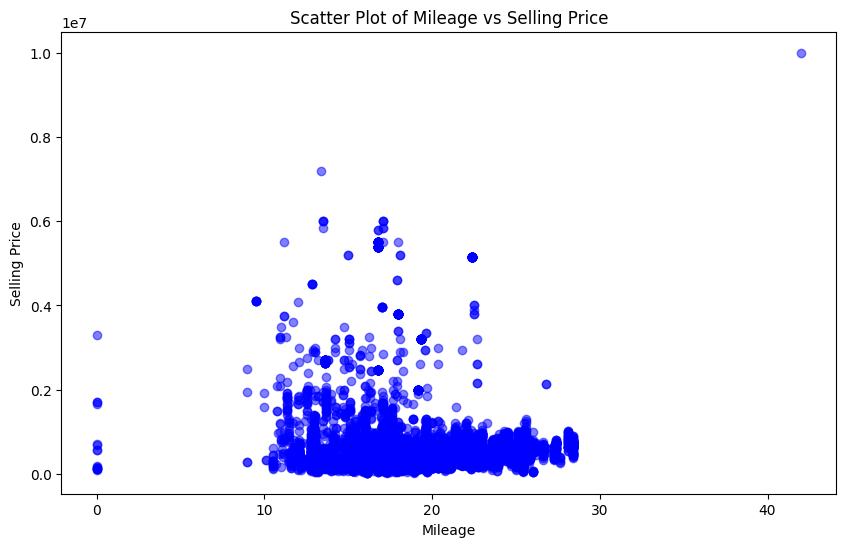

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Mileage'], df1['Selling_Price'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Mileage vs Selling Price')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')

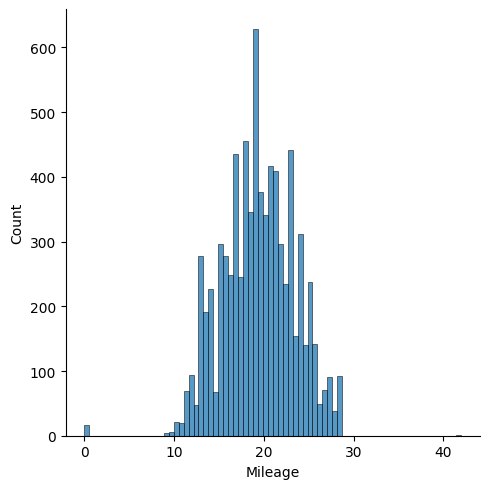

In [96]:
# Create a histogram using Seaborn's displot to visualize the distribution of the 'mileage' column.
# This histogram will help in understanding the range and frequency of mileage values across the dataset.
sns.displot(data=df1, x='Mileage')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Skoda'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Renault'),
  Text(7, 0, 'Mahindra'),
  Text(8, 0, 'Tata'),
  Text(9, 0, 'Chevrolet'),
  Text(10, 0, 'Fiat'),
  Text(11, 0, 'Datsun'),
  Text(12, 0, 'Jeep'),
  Text(13, 0, 'Mercedes-Benz'),
  Text(14, 0, 'Mitsubishi'),
  Text(15, 0, 'Audi'),
  Text(16, 0, 'Volkswagen'),
  Text(17, 0, 'BMW'),
  Text(18, 0, 'Nissan'),
  Text(19, 0, 'Lexus'),
  Text(20, 0, 'Jaguar'),
  Text(21, 0, 'Land'),
  Text(22, 0, 'MG'),
  Text(23, 0, 'Volvo'),
  Text(24, 0, 'Daewoo'),
  Text(25, 0, 'Kia'),
  Text(26, 0, 'Force'),
  Text(27, 0, 'Ambassador'),
  Text(28, 0, 'Ashok'),
  Text(29, 0, 'Isuzu'),
  Text(30, 0, 'Opel'),
  Text(31, 0, 'Peugeot')])

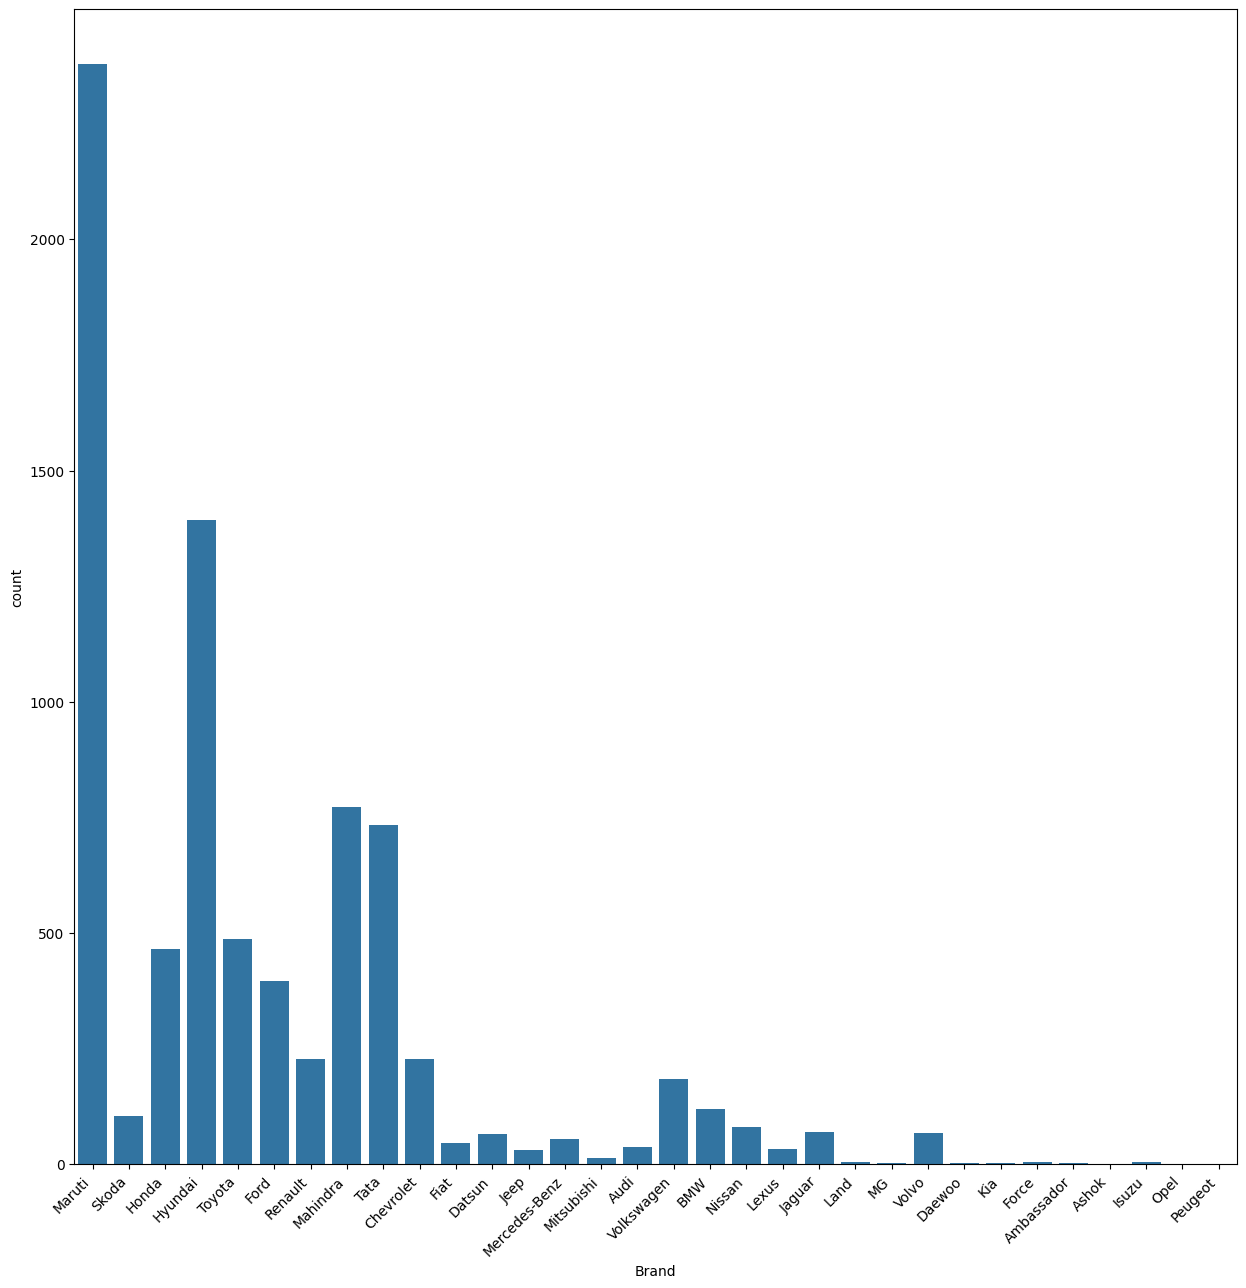

In [86]:
#counting the number of cars for each brand 

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.countplot(data=df1, x='Brand')

plt.xticks(rotation=45, ha='right')

Text(0.5, 0, 'brand')

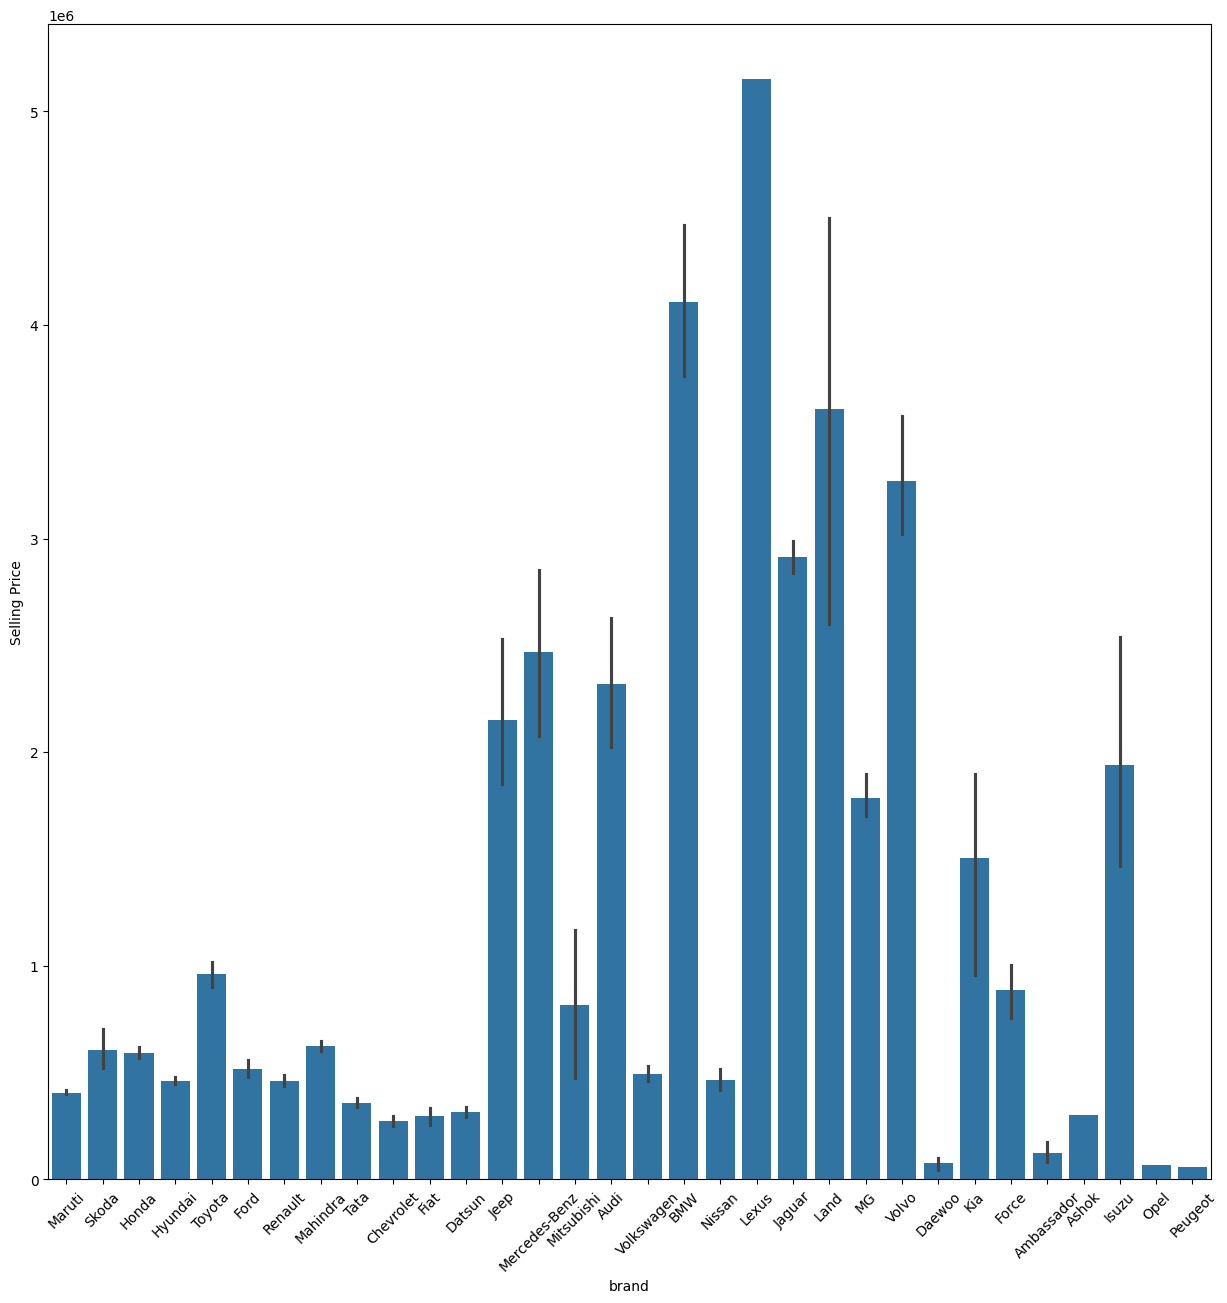

In [87]:
#taking a closer look on how the brand of a car will effect the price of the car

plt.figure(figsize = (15,15))
sns.barplot(data = df1, x = "Brand", y = "Selling_Price")
plt.xticks(rotation = 45)
plt.ylabel("Selling Price")
plt.xlabel("brand")

Text(0.5, 0, 'Year')

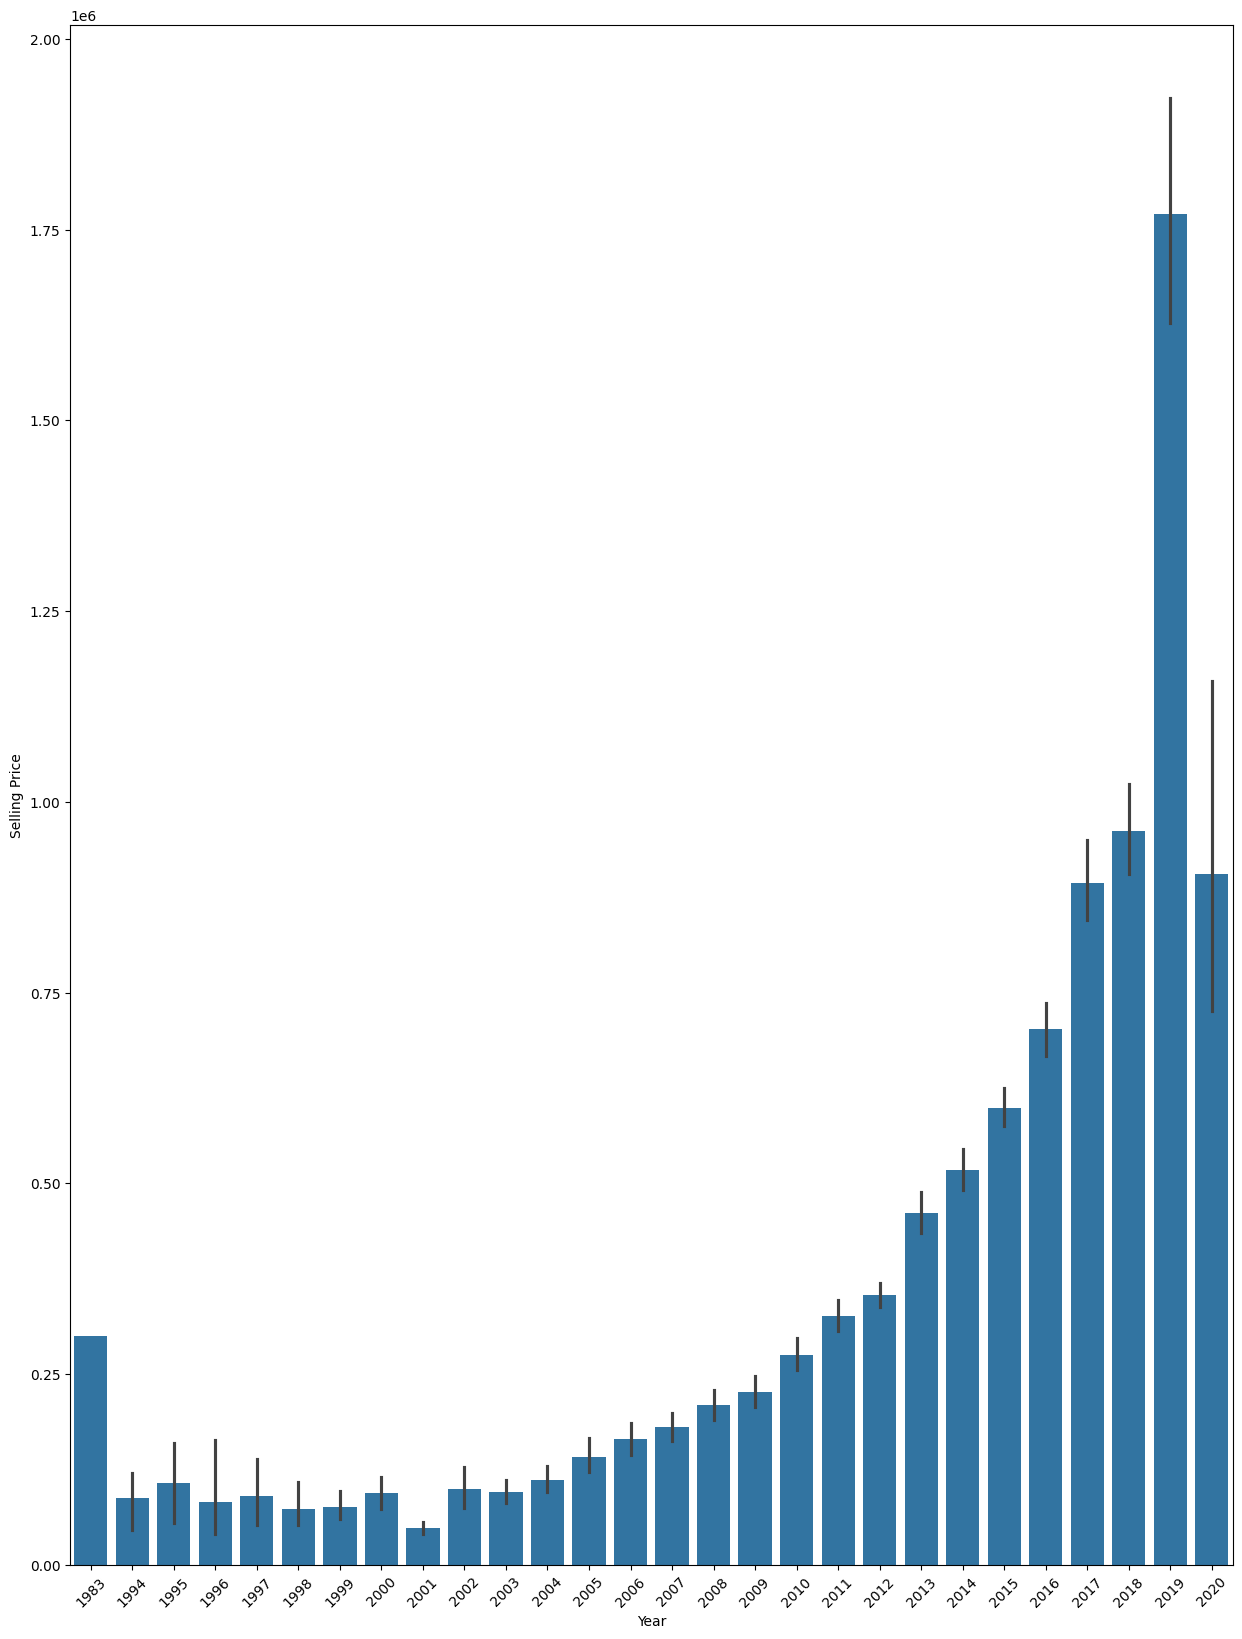

In [88]:
#seeing how price decreases with the increase in each year

plt.figure(figsize = (15,20))
sns.barplot(data = df1, x = "Year", y = "Selling_Price")
plt.xticks(rotation = 45)
plt.ylabel("Selling Price")
plt.xlabel("Year")

Text(0.5, 0, 'fuel')

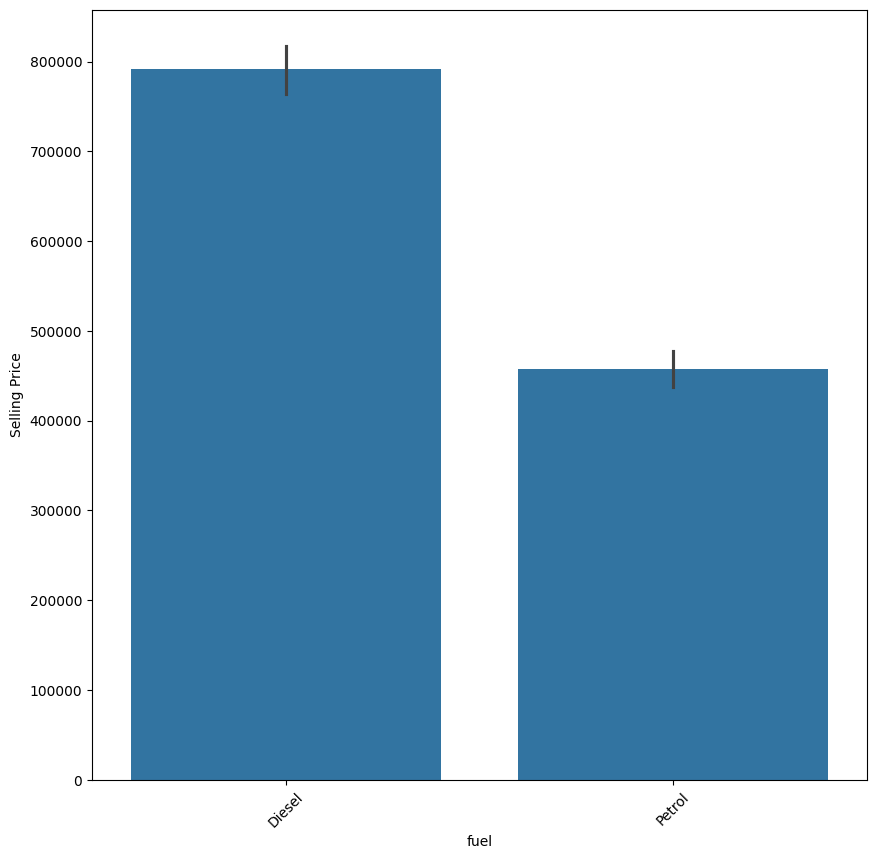

In [89]:
#the distribution of petrol and diesel cars in our dataset

plt.figure(figsize = (10,10))
sns.barplot(data = df1, x = "Fuel", y = "Selling_Price")
plt.xticks(rotation = 45)
plt.ylabel("Selling Price")
plt.xlabel("fuel")

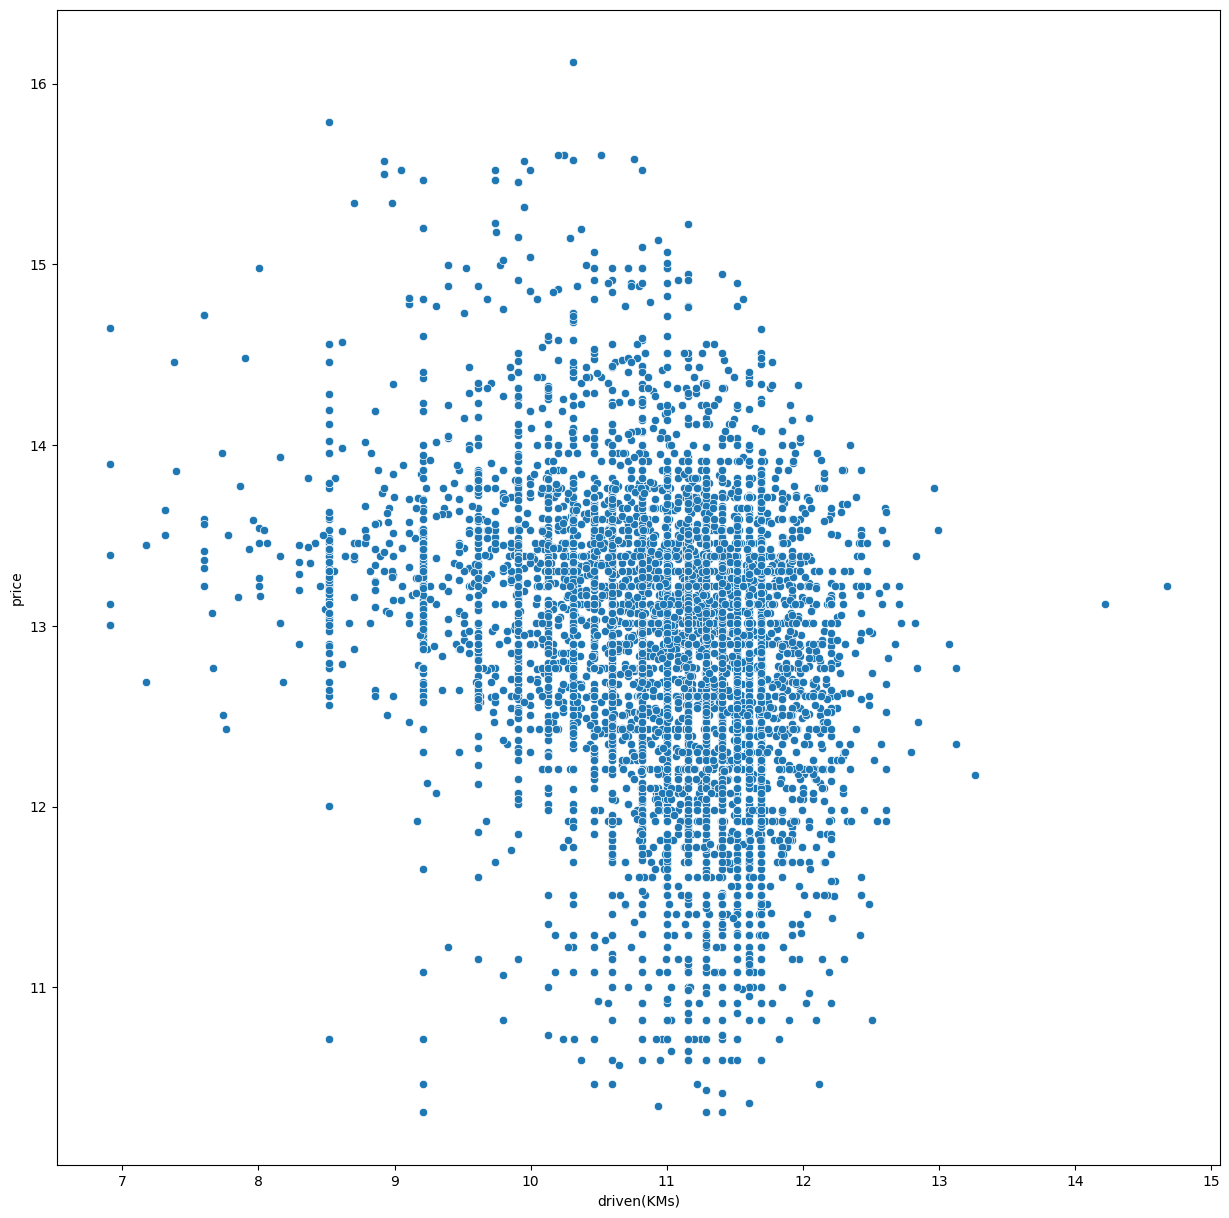

In [91]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x=np.log(df1['Driven']), y=np.log(df1['Selling_Price']))
plt.xlabel('driven(KMs)')
plt.ylabel('price')  # Corrected line continuation
plt.show()


<Axes: xlabel='Owner', ylabel='Selling_Price'>

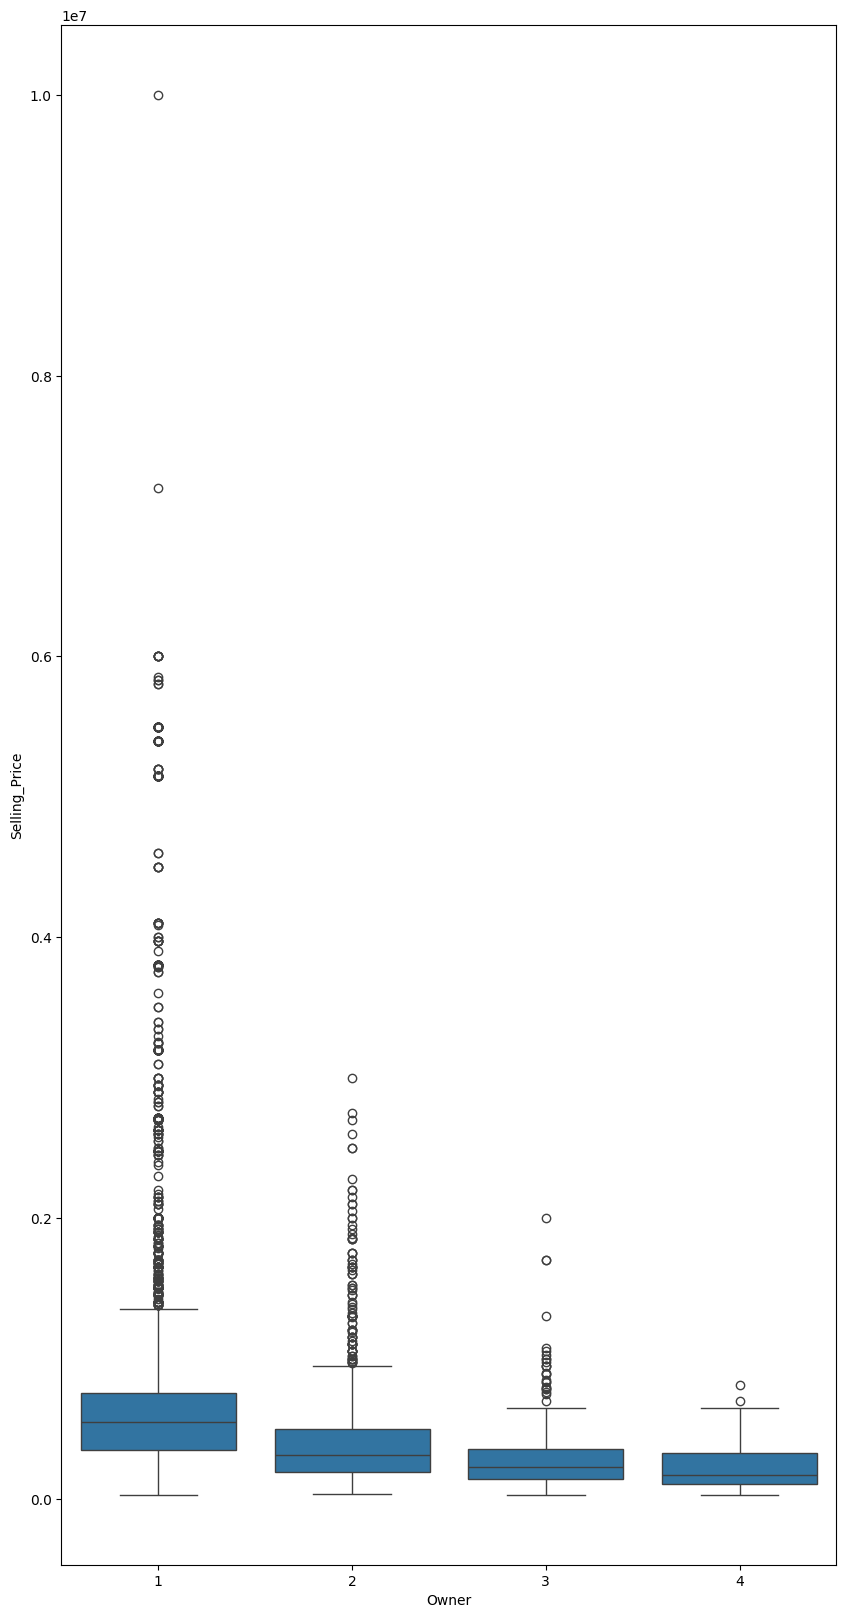

In [93]:
#visualizing the relationship between the owner and the selling price
#to have a closser look on how does the seller type have an impact on the selling price

df1 = df1[df1["Owner"] != 5]
plt.figure(figsize = (10,20))
sns.boxplot(data = df1, x = "Owner", y = "Selling_Price")

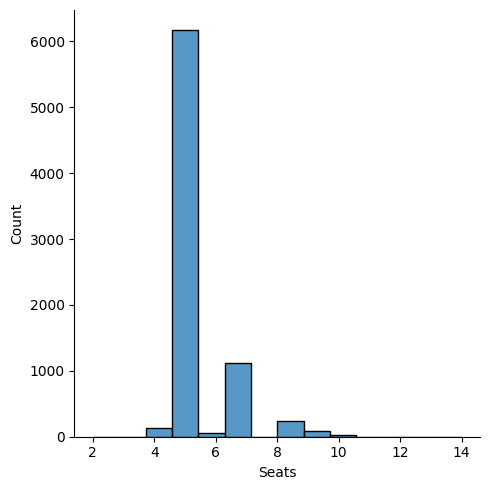

In [95]:
# Create a histogram using Seaborn's displot to visualize the distribution of the 'max_power' column.
# This histogram is useful for analyzing the range and frequency of maximum power values in the dataset.
sns.displot(data=df1, x='Seats')

### 3.2 Bivariate Analysis

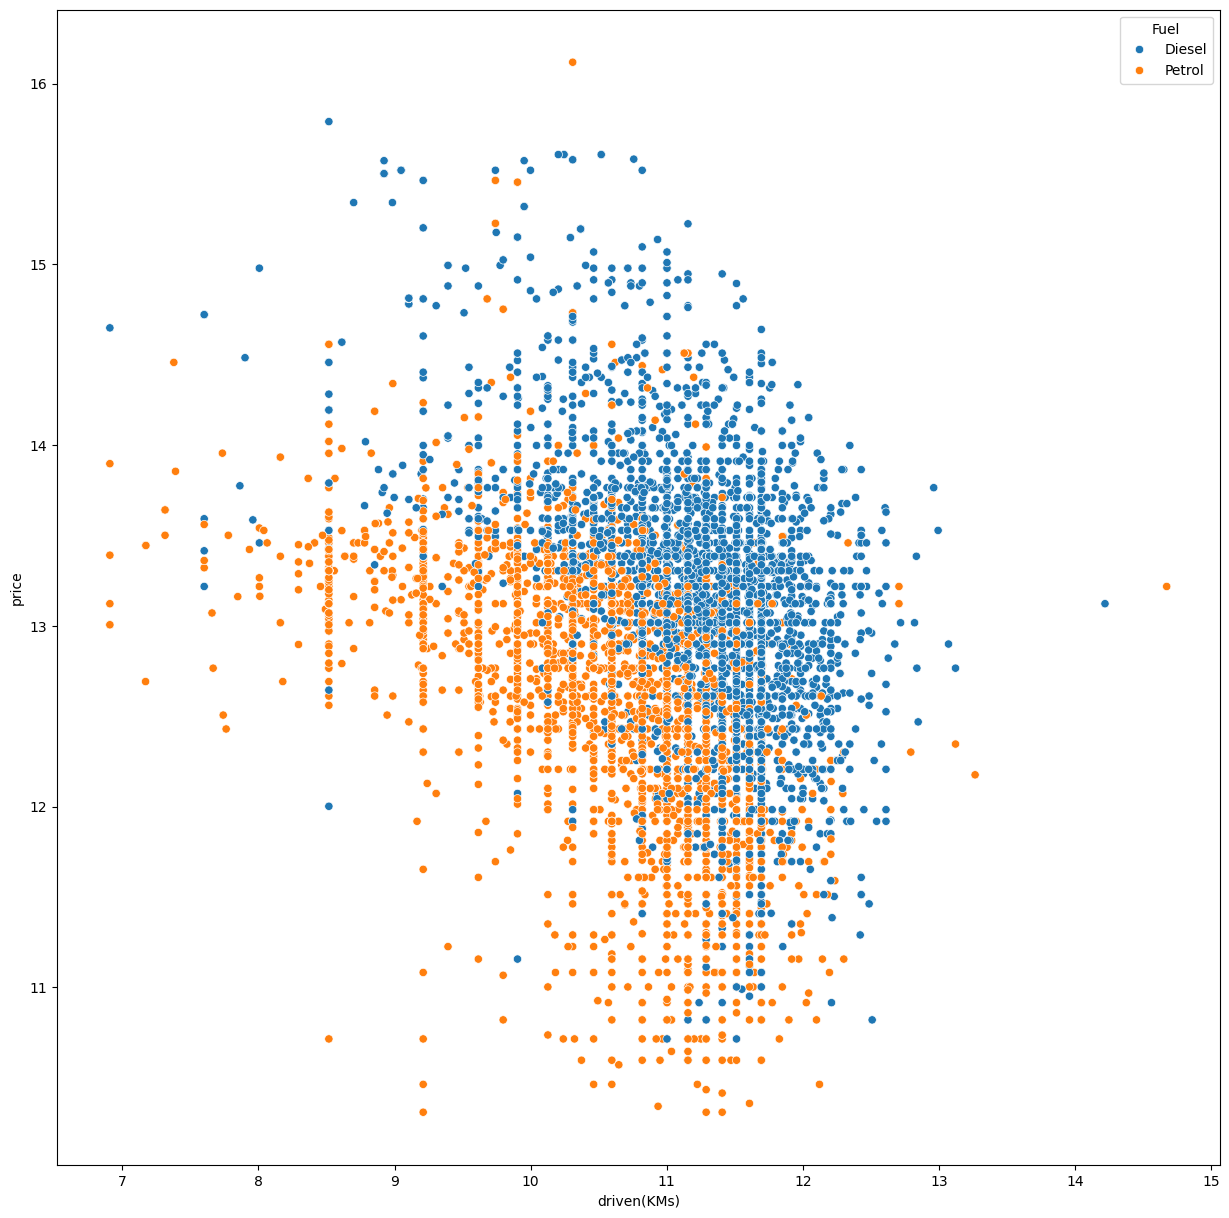

In [92]:
#how selling price is distributed with the increase in km driven filtered by Fuel type

plt.figure(figsize=(15, 15))
sns.scatterplot(x=np.log(df1['Driven']), y=np.log(df1['Selling_Price']), hue=df1['Fuel'])
plt.xlabel('driven(KMs)')
plt.ylabel('price')  # Corrected line continuation
plt.show()


We can see that the degradation in price is more in petrol cars as compaired to diesel car with the increase in the kms driven

e:\languages\python\programs\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


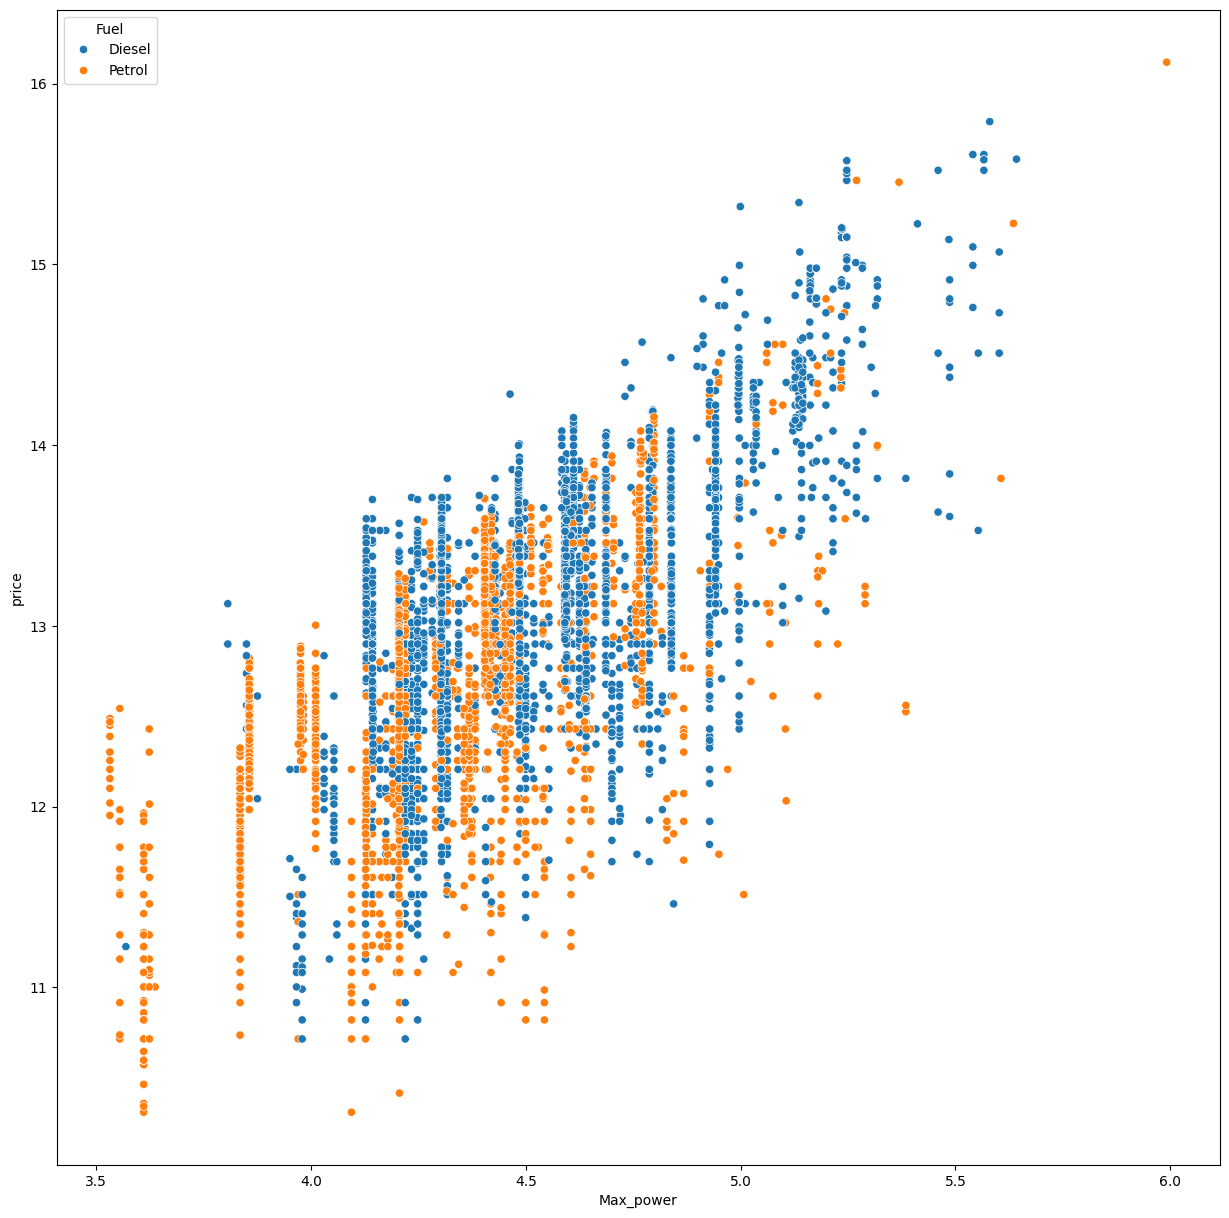

In [97]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x=np.log(df1['Max_Power']), y=np.log(df1['Selling_Price']), hue=df1['Fuel'])
plt.xlabel('Max_power')
plt.ylabel('price')  # Corrected line continuation
plt.show()

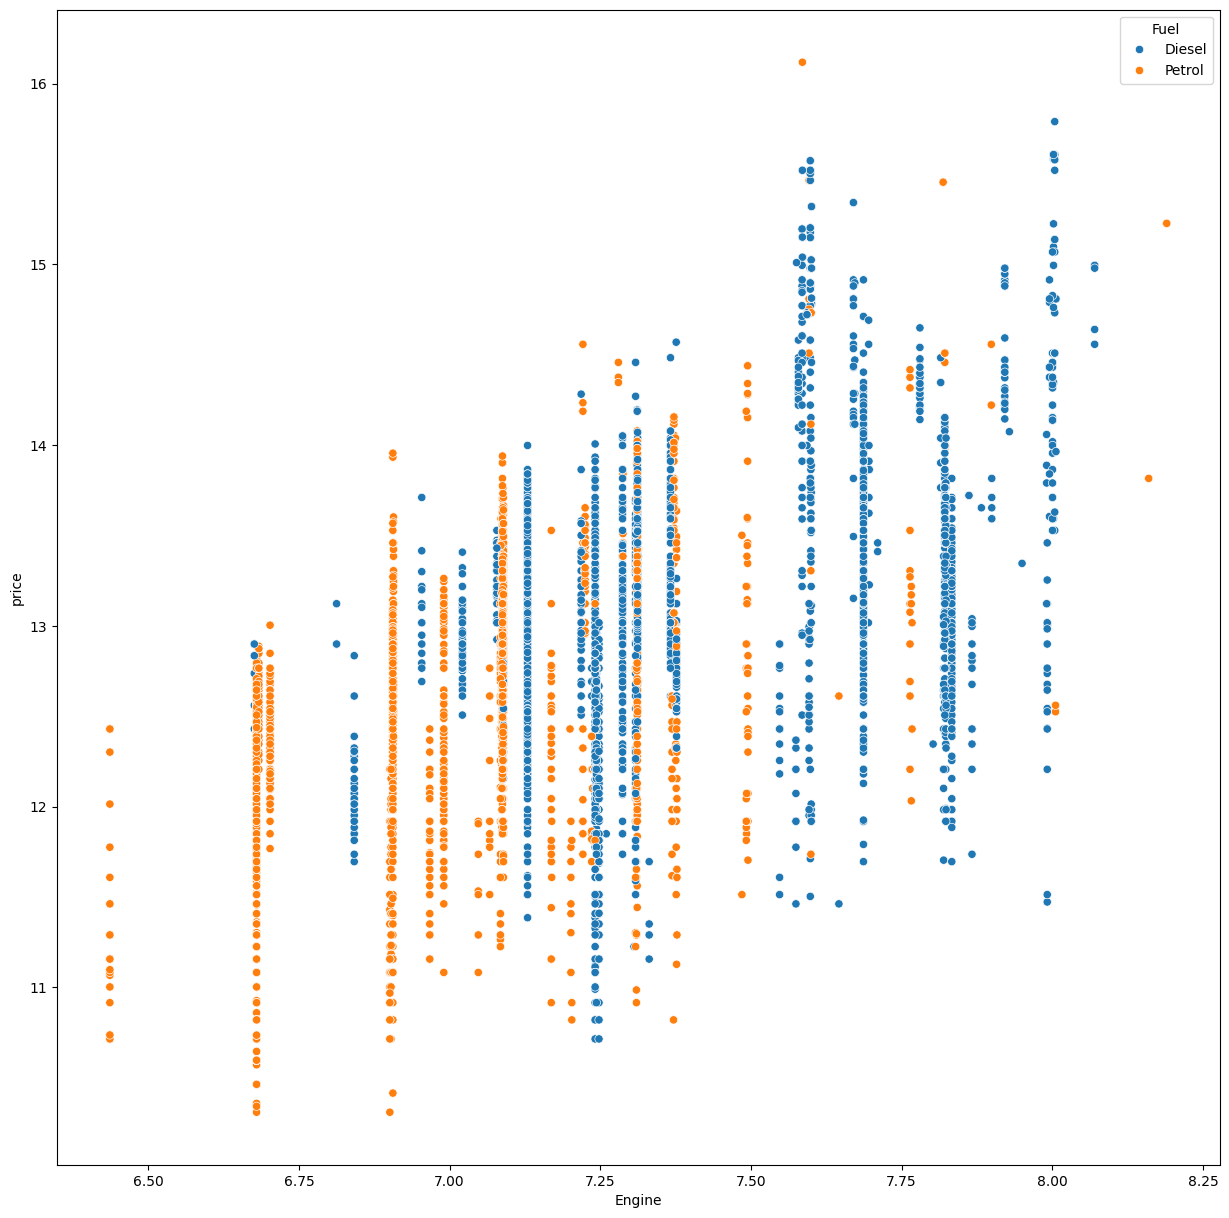

In [98]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x=np.log(df1['Engine']), y=np.log(df1['Selling_Price']), hue=df1['Fuel'])
plt.xlabel('Engine')
plt.ylabel('price')  # Corrected line continuation
plt.show()

<Axes: xlabel='Selling_Price', ylabel='Brand'>

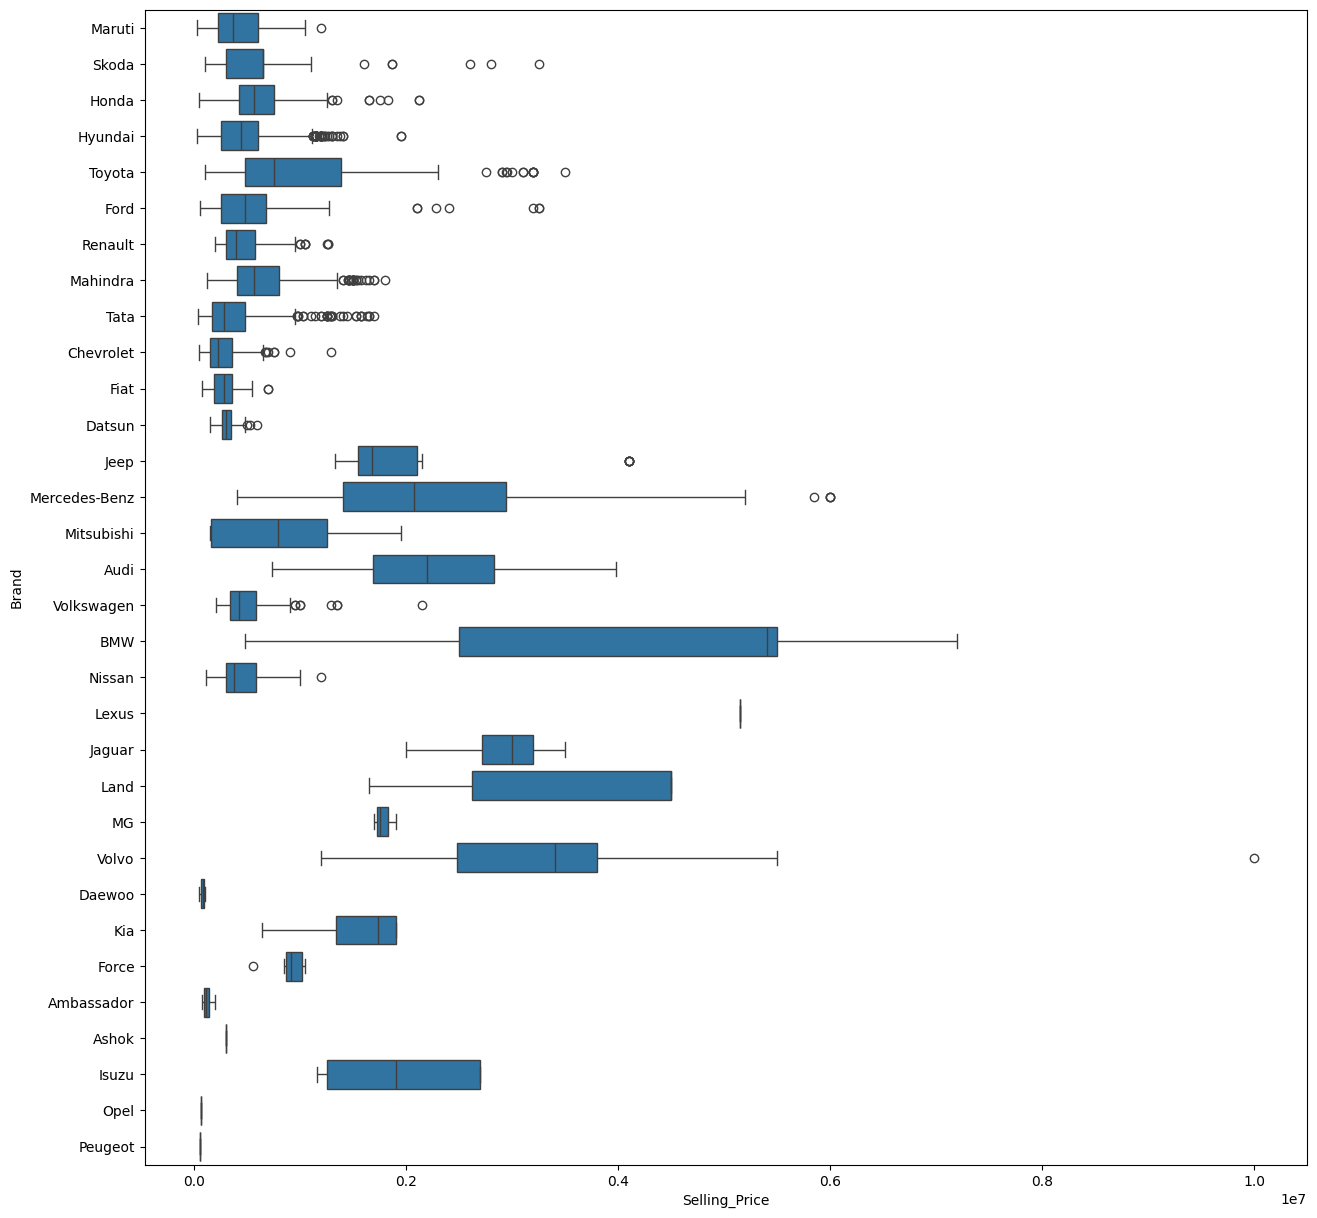

In [94]:
#taking a closer look on how the brand of a car will effect the price of the car

plt.figure(figsize = (15,15))
sns.boxplot(data = df1, y = "Brand", x = "Selling_Price")


## Feature Engineering

In [99]:
#lets encode the categorical features and do label encoding oon them so that we can visualize the relationship between the 
#the various columns using the correlation matrix

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df1["Fuel"] = encoder.fit_transform(df1["Fuel"])  
#the diesel is ended to 0 and petrol is encoded as 1
df1["Seller_Type"] = encoder.fit_transform(df1["Seller_Type"])
 #the seller type of individual is encoded as 1 and Dealer is encoded as 0 followed by Trusmark Dealer as 2
df1["Transmission"] = encoder.fit_transform(df1["Transmission"])   
#the manual is encoded as 0 and automatic cars have been encoded as 1
df1.head(10)

,Brand,Year,Selling_Price,Driven,Fuel,Seller_Type,Transmission,Mileage,Engine,Max_Power,Seats,Owner
0,Maruti,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,1
1,Skoda,2014,370000,120000,0,1,1,21.14,1498.0,103.52,5.0,2
2,Honda,2006,158000,140000,1,1,1,17.70,1497.0,78.00,5.0,3
3,Hyundai,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,1
4,Maruti,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,1
5,Hyundai,2017,440000,45000,1,1,1,20.14,1197.0,81.86,5.0,1
7,Maruti,2001,45000,5000,1,1,1,16.10,796.0,37.00,4.0,2
8,Toyota,2011,350000,90000,0,1,1,23.59,1364.0,67.10,5.0,1
9,Ford,2013,200000,169000,0,1,1,20.00,1399.0,68.10,5.0,1
10,Renault,2014,500000,68000,0,1,1,19.01,1461.0,108.45,5.0,2


### task 9:- convert the price to y = np.log(df['selling_price'])

In [100]:
#before having a look at the correlation lets normalize the values so that all are almost on the same scales
#WARNING not doing this will make the feature with the higher scale more importance

df1["Driven"] = np.log(df1["Driven"])
df1["Selling_Price"] = np.log(df1["Selling_Price"])
df1

,Brand,Year,Selling_Price,Driven,Fuel,Seller_Type,Transmission,Mileage,Engine,Max_Power,Seats,Owner
0,Maruti,2014,13.017003,11.887931,0,1,1,23.40,1248.0,74.00,5.0,1
1,Skoda,2014,12.821258,11.695247,0,1,1,21.14,1498.0,103.52,5.0,2
2,Honda,2006,11.970350,11.849398,1,1,1,17.70,1497.0,78.00,5.0,3
3,Hyundai,2010,12.323856,11.751942,0,1,1,23.00,1396.0,90.00,5.0,1
4,Maruti,2007,11.775290,11.695247,1,1,1,16.10,1298.0,88.20,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,12.676076,11.608236,1,1,1,18.50,1197.0,82.85,5.0,1
8124,Hyundai,2007,11.813030,11.686879,0,1,1,16.80,1493.0,110.00,5.0,4
8125,Maruti,2009,12.853176,11.695247,0,1,1,19.30,1248.0,73.90,5.0,1
8126,Tata,2013,12.577636,10.126631,0,1,1,23.57,1396.0,70.00,5.0,1


In [101]:
#since the Brands of a car is of vital importance while considering a price of a vehilce so we cannot convert the brands to a label encoding since it would them
#give a sequesnce to the brands that is not a good idea so i will take a new dataframe and copy all columns except the brand and then see the correslation betweem them

df2=df1[['Year','Selling_Price','Driven','Fuel','Seller_Type','Transmission','Mileage','Engine','Max_Power','Seats','Owner']]
df2

,Year,Selling_Price,Driven,Fuel,Seller_Type,Transmission,Mileage,Engine,Max_Power,Seats,Owner
0,2014,13.017003,11.887931,0,1,1,23.40,1248.0,74.00,5.0,1
1,2014,12.821258,11.695247,0,1,1,21.14,1498.0,103.52,5.0,2
2,2006,11.970350,11.849398,1,1,1,17.70,1497.0,78.00,5.0,3
3,2010,12.323856,11.751942,0,1,1,23.00,1396.0,90.00,5.0,1
4,2007,11.775290,11.695247,1,1,1,16.10,1298.0,88.20,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,12.676076,11.608236,1,1,1,18.50,1197.0,82.85,5.0,1
8124,2007,11.813030,11.686879,0,1,1,16.80,1493.0,110.00,5.0,4
8125,2009,12.853176,11.695247,0,1,1,19.30,1248.0,73.90,5.0,1
8126,2013,12.577636,10.126631,0,1,1,23.57,1396.0,70.00,5.0,1


<Axes: >

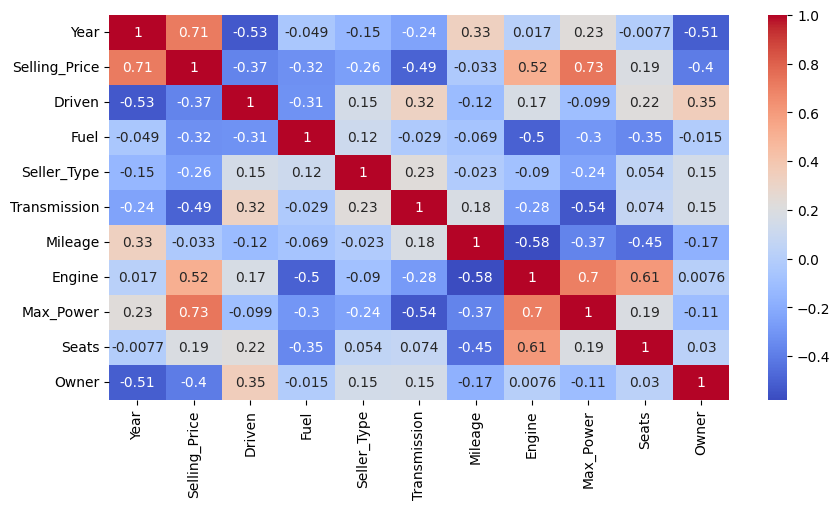

In [102]:
#now lets look at the corelatio matrix to get an insight into the relatioships that exists between the various columns
 
plt.figure(figsize = (10,5))
sns.heatmap(df2.corr(), annot = True, cmap = "coolwarm")



<Axes: xlabel='x', ylabel='y'>

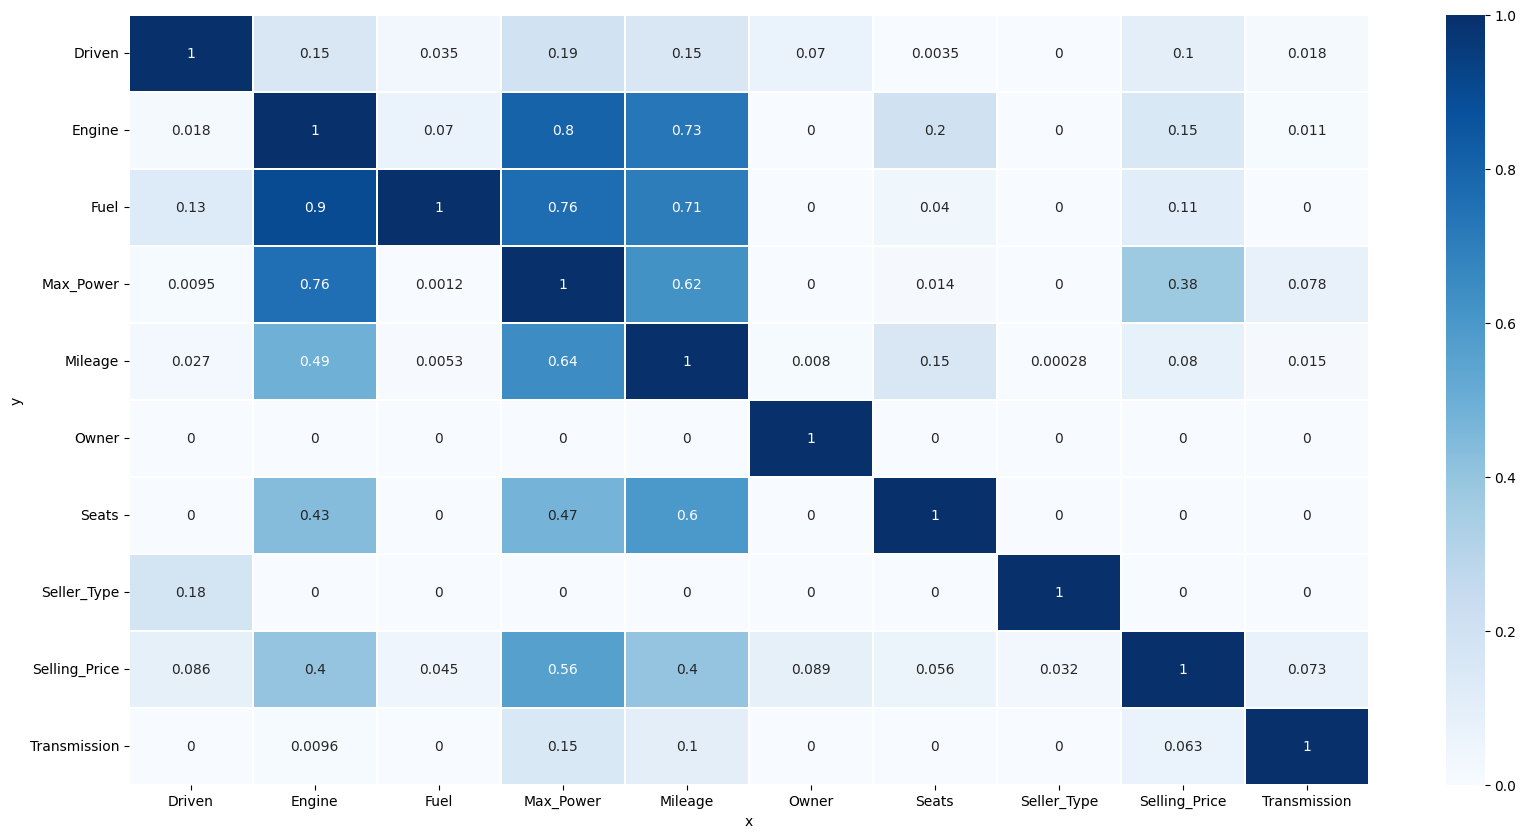

In [103]:
#The predictive power score is calculated using only 1 feature trying to predict the target column. This means there are no interaction effects between the scores of various features. Note that this is in contrast to feature importance

import ppscore as pps

df2 = df2.copy()
df2.drop([ 'Year'], axis= 1, inplace=True)
matrix_df = pps.matrix(df2)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# plot
plt.figure(figsize = (20,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.25, annot=True)

## Feature selection


After analysing the dataframe above we can see that we have identified the features for he model training to be Fuel, Transmission, Driven, Year and Engine(We have dropped max power since engine and max_power is highly correlated and dipect the same thing)

In [104]:
# from the above correlation matrix we can see that 
# Create actual prediction in heatmap again

Df_final=df1[[ 'Fuel', 'Transmission', 'Driven', 'Year', 'Engine','Selling_Price']]
Df_final

,Fuel,Transmission,Driven,Year,Engine,Selling_Price
0,0,1,11.887931,2014,1248.0,13.017003
1,0,1,11.695247,2014,1498.0,12.821258
2,1,1,11.849398,2006,1497.0,11.970350
3,0,1,11.751942,2010,1396.0,12.323856
4,1,1,11.695247,2007,1298.0,11.775290
...,...,...,...,...,...,...
8123,1,1,11.608236,2013,1197.0,12.676076
8124,0,1,11.686879,2007,1493.0,11.813030
8125,0,1,11.695247,2009,1248.0,12.853176
8126,0,1,10.126631,2013,1396.0,12.577636


In [105]:
#splitting the dependent and indepent variables X=independent variables
#Y=dependent variables

X=Df_final[[ 'Fuel', 'Transmission', 'Driven', 'Year', 'Engine']]
Y=Df_final['Selling_Price']

In [106]:
# Train-test split
# random_state we can use whatever numbers we want;
# It just allows us to reproduce that everytime we run the code again split things into training and testing set in a reproducible way


from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 30)

## Preprocessing

In [107]:
#checking if all the columns have null values by looking into the total number of values in each columns

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6823 entries, 1398 to 6006
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fuel          6823 non-null   int32  
 1   Transmission  6823 non-null   int32  
 2   Driven        6823 non-null   float64
 3   Year          6823 non-null   int64  
 4   Engine        6640 non-null   float64
dtypes: float64(2), int32(2), int64(1)
memory usage: 266.5 KB


In [108]:
#checking the total number of values in each column

X_train.isnull().sum()

Fuel              0
Transmission      0
Driven            0
Year              0
Engine          183
dtype: int64

now we can have two approches to this

1. since we have 6823 entries and only engine column has null values so we can drop all the rows where engine values is null(since is curresponds to only 3% of the data)
2. fill the null values


we choose the '2' option since we dont want to encounter a data loss

In [109]:
#checking the distribution of the Engine column

X_train.Engine.describe()

count    6640.000000
mean     1459.818825
std       505.776981
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: Engine, dtype: float64

<Figure size 1000x1000 with 0 Axes>

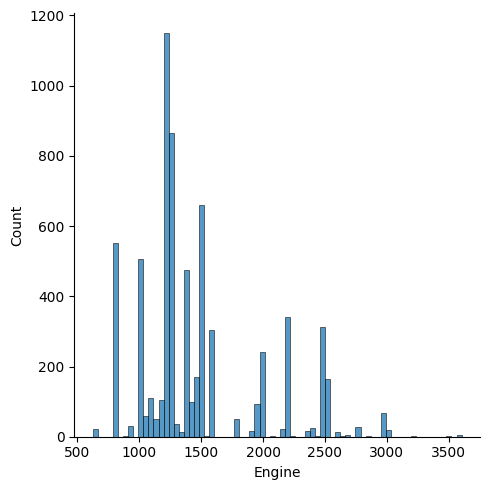

In [110]:
# looking at the graph for checking the distribution of the engine values
plt.figure(figsize=(10,10))
sns.displot(data=X_train, x = 'Engine')
plt.tight_layout()

### We can see that the values are not distrubuted rather we can say that there is a finite number of categorical values. therefore inorder to fill the null values we use the mode(most occuring value). to fill the null values

In [111]:
#checking the mode and median of the enigne column

X_train['Engine'].median(),X_train['Engine'].mode()


(1248.0,
 0    1248.0
 Name: Engine, dtype: float64)

since the mode and median are both the same we choose to continue with mode since the engine is more towards descrete than continuous 

In [112]:
#using the mode to fill null values in the Engine column
 
X_train['Engine'].fillna(X_train['Engine'].mode()[0], inplace=True)


In [113]:
#checking if we have filled all the null values in the training data set

X_train.isnull().sum()

Fuel            0
Transmission    0
Driven          0
Year            0
Engine          0
dtype: int64

In [114]:
#checking the total number of values in each column

x_test.isnull().sum()

Fuel             0
Transmission     0
Driven           0
Year             0
Engine          31
dtype: int64

In [115]:
#Using the mode of the traing engine columns to fill the empty sells of the Engine column in test dataset

x_test['Engine'].fillna(X_train['Engine'].mode()[0], inplace=True)


In [116]:
#checking if we have filled all the null values in the test data set

x_test.isnull().sum()

Fuel            0
Transmission    0
Driven          0
Year            0
Engine          0
dtype: int64

In [117]:
# Check shape of features and target

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ", Y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6823, 5)
Shape of X_test:  (1205, 5)
Shape of y_train:  (6823,)
Shape of y_test:  (1205,)


## Model Selection

In [118]:
#importing the XGboost algorithm

import xgboost as xgb

In [119]:
# Prepare type of regressors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

algorithms = [LinearRegression(), Ridge(), Lasso(), SVR(),
              KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 200, random_state = 0),
              XGBRegressor(n_estimators = 200, random_state = 0)]

algorithm_names = ["Linear Regression", "Ridge", "Lasso", "SVR", "KNeighbors Regressor", 
                   "Decision-Tree Regressor", "Random-Forest Regressor","XGBRegressor"]

In [120]:
# defining splits of kfold
kfold = KFold(n_splits=8, shuffle=True)

# iterate for finding mse and mean mse for each model
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.13160947 -0.13234146 -0.14377056 -0.14129005 -0.12999671 -0.15004879
 -0.13412144 -0.14448357]; Mean: -0.1384577558711218
Ridge - Score: [-0.13298693 -0.1349431  -0.13780259 -0.13888713 -0.14928434 -0.15058141
 -0.13349122 -0.12852292]; Mean: -0.13831245526976613
Lasso - Score: [-0.22115848 -0.22085672 -0.25690181 -0.25328127 -0.23357876 -0.25167414
 -0.22845197 -0.23692669]; Mean: -0.2378537292269013
SVR - Score: [-0.43451945 -0.45167766 -0.49354573 -0.47612269 -0.47737971 -0.46062637
 -0.44492165 -0.49037812]; Mean: -0.4661464217838544
KNeighbors Regressor - Score: [-0.07993343 -0.06944054 -0.07376257 -0.07535769 -0.07473075 -0.07741447
 -0.07361293 -0.07508737]; Mean: -0.07491746650757976
Decision-Tree Regressor - Score: [-0.09698884 -0.09970823 -0.11260301 -0.09977306 -0.0969165  -0.09707229
 -0.09460158 -0.12019206]; Mean: -0.10223194647334787
Random-Forest Regressor - Score: [-0.07024365 -0.07104782 -0.07559195 -0.07249939 -0.0738746  -0.07538902
 -

Based on the mean scores,the model XGBRegressor has the highest accuracy since it has the lowest mean square error. so we will consider the XGBRegressor model for our problem.

## training the model to further incease the efficiency

In [121]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 10, 15], 'learning_rate': [0.01, 0.02, 0.05, 0.1],
              'n_estimators': [200, 300, 400, 500, 600]}

rf = XGBRegressor(random_state = 10)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, Y_train);

In [122]:
#lets have a look at our paramaeters

grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

In [123]:
# Find your grid_search's best score

best_mse = grid.best_score_
best_mse

-0.06381189575647855

# Testing

In [124]:
# Test model
pred_y = grid.predict(x_test)
print("MSE of this model is:",mean_squared_error(np.exp(y_test), np.exp(pred_y)))# find mse
print("R-squared of this model is:", r2_score(np.exp(y_test), np.exp(pred_y))) # find r2

MSE of this model is: 71202891383.70605
R-squared of this model is: 0.8914440008430302


## Inference

In [125]:
import pickle

# save the model 
filename = 'A1_Car.pkl'
pickle.dump(grid, open(filename, 'wb'))

In [126]:
# load the model for testing
loaded_model = pickle.load(open(filename, 'rb'))

In [127]:
#collecting data from one of the column and then using the independent variables values of these to use the model and compare the 
#yhat and the y

df1[['Fuel', 'Transmission', 'Driven', 'Year', 'Engine']].loc[145]

Fuel               0.000000
Transmission       0.000000
Driven             9.998798
Year            2018.000000
Engine          1969.000000
Name: 145, dtype: float64

In [128]:
# Check if model could be applied.
sample = np.array([[0.000000,0.000000,9.998798,2018.000000,1969.000000]])
predicted_car_price = loaded_model.predict(sample)
np.exp(predicted_car_price)

array([2979277.], dtype=float32)

## Summary